In [6]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import math
legend_properties = {'weight':'bold'}

In [11]:
import numpy as np
import pickle, os
result_folder = r"E:\data\dao-0310-23\V4_4\Survival_2"
base_folder = r"E:\data\dao-0310-23\V4_4"
sub_prefix = "Survival_2/Survival_dict_"

dao_all, hierarchy_all, autonomy_all = [], [], []

for i in range(1, 7):
    folder = os.path.join(base_folder, f"{sub_prefix}{i}")
    with open(os.path.join(folder, "dao_percentage_across_turbulence_time"), "rb") as f:
        dao_all.append(pickle.load(f))
    with open(os.path.join(folder, "hierarchy_percentage_across_turbulence_time"), "rb") as f:
        hierarchy_all.append(pickle.load(f))
    with open(os.path.join(folder, "autonomy_percentage_across_turbulence_time"), "rb") as f:
        autonomy_all.append(pickle.load(f))

# ---- element-wise averages ----
# Convert to NumPy arrays so they stack into shape (num_files, length_of_series)
dao_avg = np.mean(np.array(dao_all), axis=0).tolist()
hierarchy_avg = np.mean(np.array(hierarchy_all), axis=0).tolist()
autonomy_avg  = np.mean(np.array(autonomy_all), axis=0).tolist()

print("Length of averaged DAO series:", len(dao_avg))
print("First 5 DAO averages:", dao_avg[:5])


Length of averaged DAO series: 11
First 5 DAO averages: [0.333333333333333, 0.41194444444444417, 0.48386111111111113, 0.48501851851851846, 0.48554629629629614]


In [12]:
# Define more colors
# NUS two colors
nus_blue = "#003D7C"
nus_orange = "#EF7C00"
# Nature three colors
nature_orange = "#F16C23"
nature_blue = "#2B6A99"
nature_green = "#1B7C3D"
# Morandi six colors
morandi_blue = "#046586"
morandi_green =  "#28A9A1"
morandi_yellow = "#C9A77C"
morandi_orange = "#F4A016"
morandi_pink = "#F6BBC6"
morandi_red = "#E71F19"
morandi_purple = "#B08BEB"
# Others
shallow_grey = "#D3D4D3"
deep_grey = "#A6ABB6"

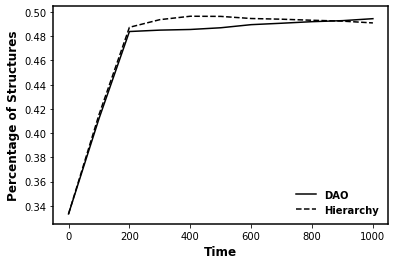

<Figure size 432x288 with 0 Axes>

In [14]:
# Performance

x = list(range(0, 1001, 100))
fig, ax = plt.subplots()
ax.spines["left"].set_linewidth(1.5)
ax.spines["right"].set_linewidth(1.5)
ax.spines["top"].set_linewidth(1.5)
ax.spines["bottom"].set_linewidth(1.5)

plt.plot(x, dao_avg, "k-", label="DAO")
plt.plot(x, hierarchy_avg, "k--", label="Hierarchy")
# plt.plot(x, autonomy_avg, "k:", label="Autonomy")
plt.xlabel('Time', fontweight='bold', fontsize=12)
plt.ylabel('Percentage of Structures', fontweight='bold', fontsize=12)
# plt.xticks(x)
plt.legend(frameon=False, ncol=1, fontsize=12, prop=legend_properties)
plt.savefig(result_folder + r"\structure_percentage.png", transparent=True, dpi=300)
plt.show()
plt.clf()

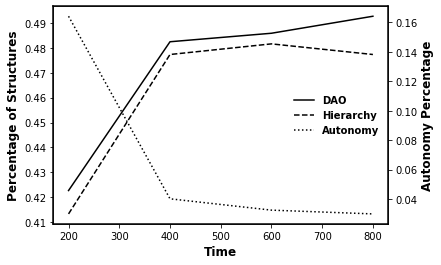

<Figure size 432x288 with 0 Axes>

In [18]:
# Performance
fig, ax1 = plt.subplots()

# Main axis styling
for spine in ["left", "right", "top", "bottom"]:
    ax1.spines[spine].set_linewidth(1.5)

# First y-axis (DAO & Hierarchy)
ax1.plot(x, dao_percentage, "k-", label="DAO")
ax1.plot(x, hierarchy_percentage, "k--", label="Hierarchy")
ax1.set_xlabel("Time", fontweight="bold", fontsize=12)
ax1.set_ylabel("Percentage of Structures", fontweight="bold", fontsize=12)

# Second y-axis for Autonomy
ax2 = ax1.twinx()
ax2.plot(x, autonomy_percentage, "k:", label="Autonomy")   # dotted line
ax2.set_ylabel("Autonomy Percentage", fontweight="bold", fontsize=12)

# Legends: combine handles from both axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2,
           frameon=False, ncol=1, fontsize=12,
           prop=legend_properties,
           loc='center right')   # or loc=7
# Save and show
plt.savefig(data_folder + r"\structure_percentage.png",
            transparent=True, dpi=300)
plt.show()
plt.clf()


In [9]:
# import numpy as np
# # 500
# # dao_performance_short = dao_performance[:500]
# # hierarchy_performance_short = hierarchy_performance[:500]
# # # If your series are Python lists, cast to numpy arrays
# # dao = np.asarray(dao_performance_short, dtype=float)
# # hier = np.asarray(hierarchy_performance_short, dtype=float)
#
# # 1000
# dao = np.asarray(dao_performance, dtype=float)
# hier = np.asarray(hierarchy_performance, dtype=float)
# # Optional: check lengths and align if needed
# n = min(len(dao), len(hier))
# dao, hier = dao[:n], hier[:n]
#
# # Time axis: assume unit time steps t = 0,1,...,n-1
# t = np.arange(n, dtype=float)
#
# # 1) Signed area (positive ⇒ DAO > Hierarchy on average)
# diff = dao - hier
# signed_area = np.trapz(diff, t)                  # ∫ (DAO - Hier) dt
# T = t[-1] - t[0] if n > 1 else 1.0               # horizon length
# avg_signed_gap = signed_area / T                 # time-normalized average gap
#
# # 2) Enclosed area (magnitude only; insensitive to who leads)
# enclosed_area = np.trapz(np.abs(diff), t)        # ∫ |DAO - Hier| dt
#
# # 3) Intersection points (linear interpolation between samples)
# sign_change_idx = np.where(np.sign(diff[:-1]) * np.sign(diff[1:]) < 0)[0]
# t_cross = []
# for i in sign_change_idx:
#     # Linear interpolation of zero crossing for diff between t[i] and t[i+1]
#     # diff(t) = diff[i] + (diff[i+1]-diff[i]) * alpha; solve for diff(t)=0
#     denom = (diff[i+1] - diff[i])
#     if denom != 0:
#         alpha = -diff[i] / denom
#         t0 = t[i] + alpha * (t[i+1] - t[i])
#         t_cross.append(t0)
# t_cross = np.array(t_cross)
#
# print(f"Signed area (DAO - Hier): {signed_area:.6f}")
# print(f"Average signed gap per unit time: {avg_signed_gap:.6f}")
# print(f'Enclosed area (∫|DAO-Hier| dt): {enclosed_area:.6f}')
# print(f'Number of intersections: {len(t_cross)}')
# if len(t_cross) > 0:
#     print("Crossing times (approx.):", t_cross)
#
#
# # Cannot use this indicator; because the initial advantage of Hierarchies is huge, compared to the subsequent advantage of DAOs
# # The key theoretical claim here is that although hierarchies outperform early, DAOs catch up after ~t=300, and sustain advantage afterward.
# # Thus, we need to highlights end-state advantage (long-term perspective), consistent with theoretical claims about adaptability in turbulence (Fang 2010, Sturm 2021).

Signed area (DAO - Hier): -11.232683
Average signed gap per unit time: -0.011244
Enclosed area (∫|DAO-Hier| dt): 13.353774
Number of intersections: 1
Crossing times (approx.): [661.18987342]


In [10]:
# # End-stage performance advantage
# import numpy as np
#
# # Example inputs (replace with your lists)
# dao = np.asarray(dao_performance, dtype=float)
# hier = np.asarray(hierarchy_performance, dtype=float)
#
# n = len(dao)
# assert len(hier) == n, "Lists must have the same length"
#
# # Choose tail fraction, e.g., last 20%
# k = 0.20
# tail_start = int((1 - k) * n)
#
# # Slice the last k% of the horizon
# dao_tail = dao[tail_start:]
# hier_tail = hier[tail_start:]
#
# # Compute long-term average gap
# long_term_gap = np.mean(dao_tail - hier_tail)
#
# print(f"Long-term average gap (DAO - Hierarchy) over last {int(k*100)}%: {long_term_gap:.6f}")
# # 004038
# # The long-term performance gap (0.004) shows a modest reversal, with naïve DAOs surpassing the best-configured hierarchies by roughly 8% of the hierarchies’ initial advantage (0.05). It is worth noting that DAO designs can be optimized.

Long-term average gap (DAO - Hierarchy) over last 20%: 0.004038


In [13]:
# # End-stage performance advantage
# import numpy as np
#
# # Example inputs (replace with your lists)
# dao = np.asarray(dao_performance, dtype=float)
# hier = np.asarray(hierarchy_performance, dtype=float)
#
# n = len(dao)
# assert len(hier) == n, "Lists must have the same length"
#
# # Choose tail fraction, e.g., last 20%
# k = 0.30
# tail_start = int((1 - k) * n)
#
# # Slice the last k% of the horizon
# dao_tail = dao[tail_start:]
# hier_tail = hier[tail_start:]
#
# # Compute long-term average gap
# long_term_gap = np.mean(dao_tail - hier_tail)
#
# print(f"Long-term average gap (DAO - Hierarchy) over last {int(k*100)}%: {long_term_gap:.6f}")
# # 004038
# # The long-term performance gap (0.004) shows a modest reversal, with naïve DAOs surpassing the best-configured hierarchies by roughly 8% of the hierarchies’ initial advantage (0.05). It is worth noting that DAO designs can be optimized.

Long-term average gap (DAO - Hierarchy) over last 30%: 0.003490
